In [1]:
import numpy as np
from scipy.stats import entropy

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics 
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix

In [3]:
from sklearn import svm, datasets
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
import graphviz

# <font color = 'red'> ЛР 5. Дерево принятия решений </font>

Сложность: <font color = 'green'> Легко  </font>.

Дата составления: 21.10.2023

Срок выполнения: 1 неделя (с момента первой практики после выдачи).

Автор: ст. преподаватель Кушнеров А.В.

## <font color = 'green'> 1. Энтропия.  </font>

**Энтропия Шеннона** - мера хаотичности множества. Пусть задано множество из $N$ представителей $s$ различных классов. $X = (x_{1},x_{1},x_{1},...,x_{2},x_{2},...,...x_{s},x_{s},...)$.

Энтропия тогда может быть вычислена по формуле:

$$S(X)=-\displaystyle\sum_{i=1}^{s} p_{i}\log_2 p_{i}$$

Где, $p_{i}=N_{i}/N$.

<font color = 'red' size = 5>Задание 1 </font>

Реализуйте функцию для подсчёта энтропии Шеннонна для заданной выборки. Сравните результат работы со встроенной функцией.


[Справочная информация](https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D1%84%D0%BE%D1%80%D0%BC%D0%B0%D1%86%D0%B8%D0%BE%D0%BD%D0%BD%D0%B0%D1%8F_%D1%8D%D0%BD%D1%82%D1%80%D0%BE%D0%BF%D0%B8%D1%8F)


In [4]:
test = np.random.randint(0,3,100)
print(test)

unique, counts = np.unique(test, return_counts=True)

[2 1 1 0 1 1 2 2 1 1 2 1 0 0 1 0 0 0 0 2 2 2 2 0 0 1 0 0 0 0 2 1 0 2 0 1 0
 2 2 0 0 0 1 2 1 1 1 0 1 0 0 2 2 2 0 2 1 1 1 2 1 1 1 2 0 1 1 2 2 2 1 0 0 1
 0 1 2 2 2 0 1 2 2 2 0 0 2 2 2 0 1 2 0 2 0 2 2 2 2 1]


In [5]:
entropy(counts,base=2)

1.5796412064211682

In [6]:
def myEntropy(test):
    unique, counts = np.unique(test, return_counts=True)
    f = lambda x: (x/test.shape[0])*np.log2(x/test.shape[0])
    proba = np.vectorize(f)
    entrop = -proba(counts).sum()
    return entrop

In [7]:
myEntropy(test)

1.5796412064211678

In [8]:
test = np.zeros(100)
print(test)

unique, counts = np.unique(test, return_counts=True)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [9]:
myEntropy(test)

-0.0

## <font color = 'green'> 2. Прирост информации и дерево принятия решений  </font>

Пусть исходное множество $X$ было разделено на несколько подмножеств (чаще всего на 2). В каждом из них можем посчитать энтропию. Мы ожидаем, что наше разбиение уменьшит энтропию в каждом из подмножеств или в целом, что должно приблизить нас к решению задачи классификации. Для того, чтобы получить полную картину вводят понятие прироста информации.

$$IG(Q) = S_{0}-\displaystyle\sum_{i=1}^{q} \frac{N_{i}}{N}S_{i}$$

Тут имеем: $S_{0}$ - энтропия исходного множества, $N_{i}$ - количесвто элементов в каждом новом классе после разбиения, $N$ - исходное количество элементов, $q$ - количество множеств после разбиения,  $S_{i}$ - энтропия новых множеств.


Суть работы решающего дерева в разделении обучающего множества на подмножества, так чтобы энтропия выборки меток уменьшалась по каждому подмножеству, а прирост информации увеличивался. В качестве критерия для разделения(по признакам) выбирают тот, который даёт наибольший прирост информации (по меткам). Эта процедура повторяется рекурсивно.

[Справочная информация](https://scikit-learn.org/stable/modules/tree.html#tree)

<font color = 'red' size = 5>Задание 2 </font>


1. Реализуйте учебное приложение, которое строит решающее дерево классификации на данных состоящих не более чем из двух признаков.
2. Проверьте своё приложение на простых искусственных данных и сравните со встроенным классом DecisionTreeClassifier.

In [104]:
class Node:
    def __init__(self, feature_idx=None, threshold=None, left=None, right=None, value=None):
        self.feature_idx = feature_idx    
        self.threshold = threshold        
        self.left = left                  
        self.right = right               
        self.value = value                

class DecisionTree:
    def __init__(self, max_depth=10):
        self.max_depth = max_depth                   
        self.root = None

    def fit(self, X, y):
        self.root = self.tree(X, y)

    def tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        if (depth >= self.max_depth or n_labels == 1):
            leaf_value = self.most_common_label(y)
            return Node(value = leaf_value)
        
        best_feat, best_thresh = self.best_criteria(X, y)

        left_idxs, right_idxs = self.split(X[:, best_feat], best_thresh)
        left = self.tree(X[left_idxs, :], y[left_idxs], depth+1)
        right = self.tree(X[right_idxs, :], y[right_idxs], depth+1)
        
        return Node(best_feat, best_thresh, left, right)
    
    
    def information_gain(self, y, X_column, split_thresh):
        left_idxs, right_idxs = self.split(X_column, split_thresh)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        N = len(y)
        N_left, N_right = len(left_idxs), len(right_idxs)
        S_left, S_right = self.entropy(y[left_idxs]), self.entropy(y[right_idxs])

        ig = self.entropy(y) - ((N_left / N) * S_left + (N_right / N) * S_right)
        return ig


    def best_criteria(self, X, y):
        best_gain = -1
        split_idx, split_thresh = None, None
        for feat_idx in range(2):
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)
            for threshold in thresholds:
                gain = self.information_gain(y, X_column, threshold)
                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_thresh = threshold
        return split_idx, split_thresh

    def entropy(self, y):
        return myEntropy(y)

    def split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def most_common_label(self, y):
        unique, counts = np.unique(y, return_counts=True)
        return max(zip(unique, counts), key=lambda x: x[1])[0]

    def predict(self, X):
        return np.array([self.pred_tree(x, self.root) for x in X])

    def pred_tree(self, x, node):
        if node.value is not None:
            return node.value
        if x[node.feature_idx] <= node.threshold:
            return self.pred_tree(x, node.left)
        else:
            return self.pred_tree(x, node.right)
    
    def print_rules(self, node, feature_names):
        if node:
            if node.feature_idx is not None:
                print(f'{feature_names[node.feature_idx]} <= {node.threshold}')
            self.print_rules(node.left, feature_names)
            self.print_rules(node.right, feature_names)
        else:
            return


In [105]:
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTree(max_depth=3)
clf.fit(X_train, y_train)
feature_names = ['feature1', 'feature2']
clf.print_rules(clf.root, feature_names)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

feature2 <= 0.058316533655986325
feature2 <= -0.3243706952431218
feature1 <= -1.040125615809266
feature1 <= 0.7905767538424556
feature1 <= 0.14434925185373204
feature2 <= 0.47922662647147374
feature2 <= 0.6545999876332684
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       108
           1       0.91      0.90      0.91        92

    accuracy                           0.92       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.91      0.92      0.91       200



In [106]:
clf = DecisionTreeClassifier(max_depth=3, criterion = 'entropy')
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91       108
           1       0.89      0.90      0.90        92

    accuracy                           0.91       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.91      0.91      0.91       200



[Text(0.5, 0.875, 'x[1] <= 0.062\nentropy = 1.0\nsamples = 800\nvalue = [392, 408]'),
 Text(0.25, 0.625, 'x[1] <= -0.323\nentropy = 0.337\nsamples = 368\nvalue = [23, 345]'),
 Text(0.125, 0.375, 'x[0] <= -0.659\nentropy = 0.057\nsamples = 303\nvalue = [2, 301]'),
 Text(0.0625, 0.125, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.1875, 0.125, 'entropy = 0.0\nsamples = 301\nvalue = [0, 301]'),
 Text(0.375, 0.375, 'x[0] <= 0.791\nentropy = 0.908\nsamples = 65\nvalue = [21, 44]'),
 Text(0.3125, 0.125, 'entropy = 0.969\nsamples = 53\nvalue = [21, 32]'),
 Text(0.4375, 0.125, 'entropy = 0.0\nsamples = 12\nvalue = [0, 12]'),
 Text(0.75, 0.625, 'x[0] <= 0.15\nentropy = 0.599\nsamples = 432\nvalue = [369, 63]'),
 Text(0.625, 0.375, 'x[1] <= 0.49\nentropy = 0.949\nsamples = 76\nvalue = [28, 48]'),
 Text(0.5625, 0.125, 'entropy = 0.993\nsamples = 40\nvalue = [22, 18]'),
 Text(0.6875, 0.125, 'entropy = 0.65\nsamples = 36\nvalue = [6, 30]'),
 Text(0.875, 0.375, 'x[1] <= 0.655\nentropy = 0.2

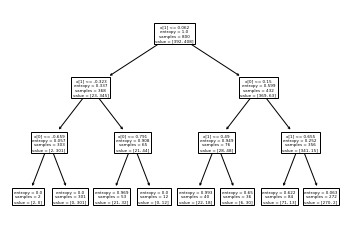

In [107]:
from sklearn.tree import plot_tree
plot_tree(clf)
#plt.show()

In [108]:
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=2,
                           random_state=28, n_clusters_per_class=1)
clf = DecisionTree(max_depth=3)
clf.fit(X, y)
y_pred = clf.predict(X)

C:\Users\asus\AppData\Local\Temp/ipykernel_19720/57743692.py:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap='coolwarm', alpha=0.2)


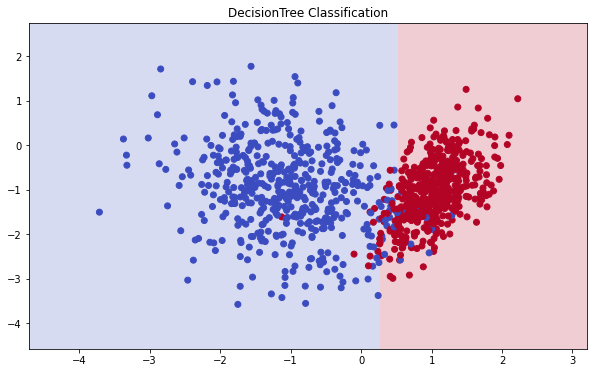

In [109]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,6))
plt.pcolormesh(xx, yy, Z, cmap='coolwarm', alpha=0.2)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("DecisionTree Classification")
plt.show()

In [110]:
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X, y)
y_pred = clf.predict(X)

C:\Users\asus\AppData\Local\Temp/ipykernel_19720/57743692.py:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap='coolwarm', alpha=0.2)


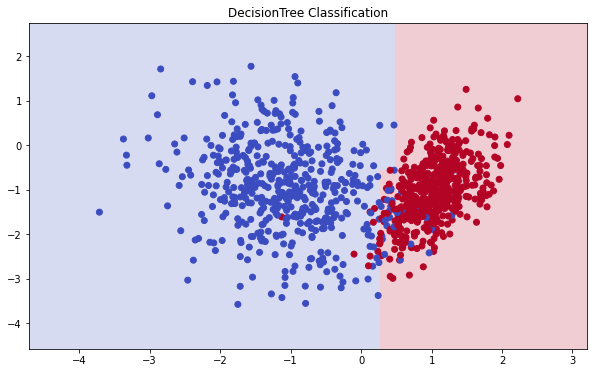

In [111]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,6))
plt.pcolormesh(xx, yy, Z, cmap='coolwarm', alpha=0.2)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("DecisionTree Classification")
plt.show()

<font color = 'red' size = 5>Задание 3 </font>

Для каждого из подзаданий:

1. Проведите предварительную обработку данных.
2. Постройте модель классификации на основе метода решающего дерева из встроенной библиотеки. 
3. Подберите оптимальные гиперпараметры модели используя различные оценки, кросс-валидацию и валидационные кривые.
4. Сделайте выводы о точности моделей.
5. Продумайте, как дерево может бороться с переобучением. Подвердите валидационными кривыми. 
6. Оцените качество модели с помощью precision\recall score.

(https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html)



##### 3.1 Скоринг отказа от услуг оператора связи.

Используйте данные из файла [telecom.csv](https://www.kaggle.com/datasets/mnassrib/telecom-churn-datasets/code) для предсказания отказа от услуг связи. Столбец "churn". 
Предврительно изучите и подготовьте данные.

#####  3.2 Предсказание диабета у пациентов.

Используйте данные из файла [diabetes.csv](https://www.kaggle.com/datasets/saurabh00007/diabetescsv) для предсказания исхода для пациентов. Столбец "outcome". Предварительно изучите и подготовьте данные. 


##### 3.3 Данные о цветках ириса

[IrisDataset](https://www.kaggle.com/datasets/uciml/iris)

##### 3.4 Грибы

Поппробуйте предсказать съедобность гриба с помощью дерева принятия решений.
[mushrooms](https://www.kaggle.com/datasets/uciml/mushroom-classification/code)



In [15]:
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay , classification_report , confusion_matrix
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score

## 3.1

In [16]:
data = pd.read_csv('new_telecom.csv')
data.head()

,account length,international plan,voice mail plan,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn
0,128,0,1,265.1,110,197.4,99,244.7,91,10.0,3,1,0
1,107,0,1,161.6,123,195.5,103,254.4,103,13.7,3,1,0
2,137,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0
3,84,1,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0
4,75,1,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0


In [17]:
y = data['churn']
data = data.drop(['churn'], axis=1)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.28,
random_state=28)

clf = DecisionTreeClassifier(random_state=123)
params =  {
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'criterion': ['gini', 'entropy', 'log_loss']
}

grid = GridSearchCV(estimator=clf,
                    param_grid=params,
                    cv=5,
                    n_jobs= - 1)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [19]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 6}

In [20]:
grid.best_score_

0.9462212943632566

In [21]:
best = grid.best_estimator_

In [22]:
y_pred = best.predict(X_test)
print ('accuracy = {}'.format(accuracy_score(y_test, y_pred)))

accuracy = 0.9314775160599572


In [23]:
cv_scores = cross_val_score(best, X_test, y_test, cv = 5)
print('Cross validation scores: {}'.format(cv_scores))
print('The average cross validation score: {}'.format(np.mean(cv_scores)))

Cross validation scores: [0.90909091 0.88770053 0.93582888 0.9144385  0.91397849]
The average cross validation score: 0.9122074636306134


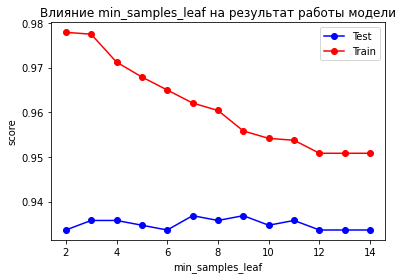

In [24]:
min_samples_leaf = list(range(2,15))
scores_test = []
scores_train = []

for i in min_samples_leaf:
    model = DecisionTreeClassifier(min_samples_leaf = i)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores_test.append(score)
    
    y_pred = model.predict(X_train)
    score = accuracy_score(y_train, y_pred)
    scores_train.append(score)
    

plt.plot(min_samples_leaf, scores_test, 'b-o', label='Test')
plt.plot(min_samples_leaf, scores_train, 'r-o', label='Train')
plt.legend()
plt.xlabel('min_samples_leaf')
plt.ylabel('score')
plt.title('Влияние min_samples_leaf на результат работы модели')
plt.show()

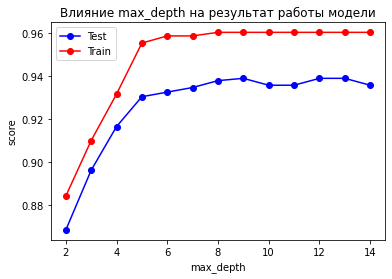

In [25]:
max_depth = list(range(2,15))
scores_test = []
scores_train = []

for i in max_depth:
    model = DecisionTreeClassifier(min_samples_leaf = 8, max_depth = i)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores_test.append(score)
    
    y_pred = model.predict(X_train)
    score = accuracy_score(y_train, y_pred)
    scores_train.append(score)
    

plt.plot(max_depth, scores_test, 'b-o', label='Test')
plt.plot(max_depth, scores_train, 'r-o', label='Train')
plt.legend()
plt.xlabel('max_depth')
plt.ylabel('score')
plt.title('Влияние max_depth на результат работы модели')
plt.show()

In [26]:
model = DecisionTreeClassifier(min_samples_leaf = 8, max_depth = 8)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print ('accuracy = {}'.format(accuracy_score(y_test, y_pred)))

accuracy = 0.9389721627408993


In [27]:
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       790
           1       0.92      0.66      0.77       144

    accuracy                           0.94       934
   macro avg       0.93      0.82      0.87       934
weighted avg       0.94      0.94      0.93       934



## 3.2

In [28]:
data = pd.read_csv('diabetes.csv')

In [112]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35.0,125.0,33.6,0.627,50
1,1,85,66,29.0,125.0,26.6,0.351,31
2,8,183,64,29.0,125.0,23.3,0.672,32
3,1,89,66,23.0,94.0,28.1,0.167,21
4,0,137,40,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48.0,180.0,32.9,0.171,63
764,2,122,70,27.0,125.0,36.8,0.340,27
765,5,121,72,23.0,112.0,26.2,0.245,30
766,1,126,60,29.0,125.0,30.1,0.349,47


In [30]:
col_idx = data.columns
print(col_idx)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [31]:
corr_matrix = data.corr()
corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


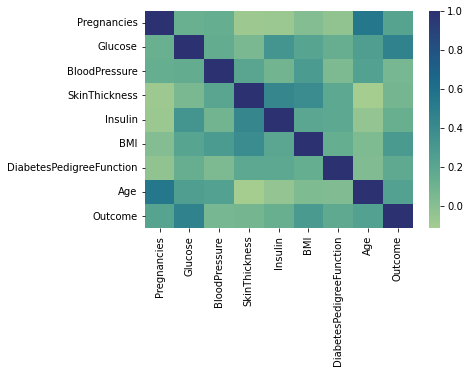

In [32]:
sns.heatmap(corr_matrix,cmap="crest");

In [33]:
data["SkinThickness"] = data["SkinThickness"].replace(0, np.NaN)
data["Insulin"] = data["Insulin"].replace(0, np.NaN)
data["BMI"] = data["BMI"].replace(0, np.NaN)

In [34]:
medians = data.median() 
data = data.fillna(medians)

In [35]:
y = data['Outcome']
data = data.drop(['Outcome'], axis=1)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.28,
random_state=28)

clf = DecisionTreeClassifier(random_state=123)
params =  {
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'criterion': ['gini', 'entropy', 'log_loss']
}

grid = GridSearchCV(estimator=clf,
                    param_grid=params,
                    cv=5,
                    n_jobs= - 1)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [37]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 1}

In [38]:
grid.best_score_

0.7572809172809172

In [39]:
best = grid.best_estimator_

In [40]:
y_pred = best.predict(X_test)
print ('accuracy = {}'.format(accuracy_score(y_test, y_pred)))

accuracy = 0.7129629629629629


In [41]:
cv_scores = cross_val_score(best, X_test, y_test, cv = 5)
print('Cross validation scores: {}'.format(cv_scores))
print('The average cross validation score: {}'.format(np.mean(cv_scores)))

Cross validation scores: [0.79545455 0.72093023 0.65116279 0.65116279 0.69767442]
The average cross validation score: 0.7032769556025371


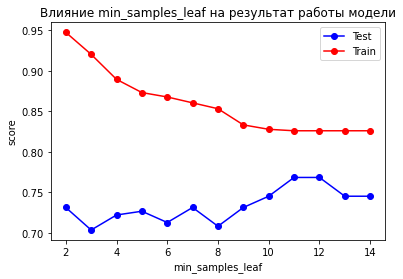

In [42]:
min_samples_leaf = list(range(2,15))
scores_test = []
scores_train = []

for i in min_samples_leaf:
    model = DecisionTreeClassifier(min_samples_leaf = i)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores_test.append(score)
    
    y_pred = model.predict(X_train)
    score = accuracy_score(y_train, y_pred)
    scores_train.append(score)
    

plt.plot(min_samples_leaf, scores_test, 'b-o', label='Test')
plt.plot(min_samples_leaf, scores_train, 'r-o', label='Train')
plt.legend()
plt.xlabel('min_samples_leaf')
plt.ylabel('score')
plt.title('Влияние min_samples_leaf на результат работы модели')
plt.show()

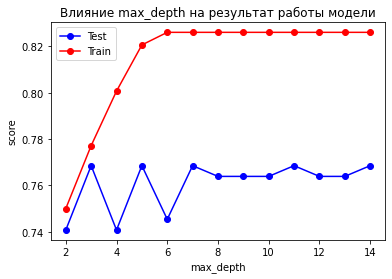

In [43]:
max_depth = list(range(2,15))
scores_test = []
scores_train = []

for i in max_depth:
    model = DecisionTreeClassifier(min_samples_leaf = 11, max_depth = i)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores_test.append(score)
    
    y_pred = model.predict(X_train)
    score = accuracy_score(y_train, y_pred)
    scores_train.append(score)
    

plt.plot(max_depth, scores_test, 'b-o', label='Test')
plt.plot(max_depth, scores_train, 'r-o', label='Train')
plt.legend()
plt.xlabel('max_depth')
plt.ylabel('score')
plt.title('Влияние max_depth на результат работы модели')
plt.show()

In [44]:
model = DecisionTreeClassifier(min_samples_leaf = 11, max_depth = 7)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print ('accuracy = {}'.format(accuracy_score(y_test, y_pred)))

accuracy = 0.7638888888888888


In [45]:
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       142
           1       0.68      0.59      0.63        74

    accuracy                           0.76       216
   macro avg       0.74      0.72      0.73       216
weighted avg       0.76      0.76      0.76       216



## 3.3

In [46]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [47]:
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [48]:
target = 'Species'
X = df.drop(columns= [target])
y = df[target]

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
clf = DecisionTreeClassifier(random_state=123)
params =  {
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'max_depth': [1, 2, 3],
    'criterion': ['gini', 'entropy', 'log_loss']
}

grid = GridSearchCV(estimator=clf,
                    param_grid=params,
                    cv=5,
                    n_jobs= - 1)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3],
                         'min_samples_leaf': [1, 2, 3, 4, 5]})

In [51]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1}

In [52]:
grid.best_score_

0.9916666666666668

In [53]:
best = grid.best_estimator_

In [54]:
y_pred = best.predict(X_test)
print ('accuracy = {}'.format(accuracy_score(y_test, y_pred)))

accuracy = 1.0


In [55]:
cv_scores = cross_val_score(best, X_test, y_test, cv = 5)
print('Cross validation scores: {}'.format(cv_scores))
print('The average cross validation score: {}'.format(np.mean(cv_scores)))

Cross validation scores: [1.         0.83333333 0.83333333 1.         1.        ]
The average cross validation score: 0.9333333333333333


In [56]:
y_pred = best.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## 3.4

In [57]:
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [59]:
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [60]:
target = 'class'
X = df.drop(columns= [target])
y = df[target]

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
clf = DecisionTreeClassifier(random_state=123)
params =  {
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'max_depth': [1, 2, 3],
    'criterion': ['gini', 'entropy', 'log_loss']
}

grid = GridSearchCV(estimator=clf,
                    param_grid=params,
                    cv=5,
                    n_jobs= - 1)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3],
                         'min_samples_leaf': [1, 2, 3, 4, 5]})

In [63]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1}

In [64]:
grid.best_score_

0.9603008231183751

In [65]:
best = grid.best_estimator_

In [66]:
y_pred = best.predict(X_test)
print ('accuracy = {}'.format(accuracy_score(y_test, y_pred)))

accuracy = 0.952


In [67]:
cv_scores = cross_val_score(best, X_test, y_test, cv = 5)
print('Cross validation scores: {}'.format(cv_scores))
print('The average cross validation score: {}'.format(np.mean(cv_scores)))

Cross validation scores: [0.95076923 0.95692308 0.94153846 0.96       0.93538462]
The average cross validation score: 0.9489230769230769


In [68]:
y_pred = best.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95       843
           1       0.93      0.98      0.95       782

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625



<font color = 'red' size = 5>Задание 4 </font>

Используя встроенные методы реализуйте регрессию с помощью решающего дерева. Примените для данных из предыдущих ЛР. Сделайте выводы. По какому принципу работает дерево в случае регресии?

In [69]:
from sklearn.tree import DecisionTreeRegressor

In [70]:
df = pd.read_csv('new_fremont_bridge.csv')
df.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hours,...,Day_22,Day_23,Day_24,Day_25,Day_26,Day_27,Day_28,Day_29,Day_30,Day_31
0,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,8.598871,...,0,0,0,0,0,0,0,0,0,0
1,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,8.616211,...,0,0,0,0,0,0,0,0,0,0
2,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,8.634877,...,0,0,0,0,0,0,0,0,0,0
3,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,8.654851,...,0,0,0,0,0,0,0,0,0,0
4,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,8.676114,...,0,0,0,0,0,0,0,0,0,0


In [71]:
target = 'Total'
X = df.drop(columns= [target])
y = df[target]

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [73]:
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

predictions = regressor.predict(X_test)

In [74]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)
print(f'R2: {r2}')

R2: 0.8449747138546466


In [75]:
reg = DecisionTreeRegressor()
params =  {
     'splitter' : ['best', 'random'],
    'max_depth': [1, 2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
}

grid = GridSearchCV(estimator=reg,
                    param_grid=params,
                    cv=5,
                    n_jobs= - 1)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'splitter': ['best', 'random']})

In [76]:
grid.best_params_

{'criterion': 'poisson',
 'max_depth': 5,
 'min_samples_leaf': 5,
 'splitter': 'best'}

In [77]:
grid.best_score_

0.8181257686131801

In [78]:
best = grid.best_estimator_

In [79]:
y_pred = best.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'R2: {r2}')

R2: 0.842628356050572


---------------

In [80]:
df = pd.read_csv('new_auto.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,0,1,2
0,18.0,8,307.0,130.0,3504,12.0,70,1.0,0.0,0.0
1,15.0,8,350.0,165.0,3693,11.5,70,1.0,0.0,0.0
2,18.0,8,318.0,150.0,3436,11.0,70,1.0,0.0,0.0
3,16.0,8,304.0,150.0,3433,12.0,70,1.0,0.0,0.0
4,17.0,8,302.0,140.0,3449,10.5,70,1.0,0.0,0.0


In [81]:
target = 'mpg'
X = df.drop(columns= [target])
y = df[target]

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [83]:
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

predictions = regressor.predict(X_test)

In [84]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)
print(f'R2: {r2}')

R2: 0.8018579899138334


In [85]:
reg = DecisionTreeRegressor()
params =  {
     'splitter' : ['best', 'random'],
    'max_depth': [1, 2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
}

grid = GridSearchCV(estimator=reg,
                    param_grid=params,
                    cv=5,
                    n_jobs= - 1)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'splitter': ['best', 'random']})

In [86]:
grid.best_params_

{'criterion': 'absolute_error',
 'max_depth': 5,
 'min_samples_leaf': 4,
 'splitter': 'best'}

In [87]:
grid.best_score_

0.8454148012485273

In [88]:
best = grid.best_estimator_

In [89]:
y_pred = best.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'R2: {r2}')

R2: 0.8367774549219531


Четко и по пунктам на каких датасетах лучше работает лог регрессия, а на каких дерево

+ Линейно неразделимые данные $\rightarrow$ Decision Tree
+ Линейно разделимые данные $\rightarrow$ Logistic Regression / Decision Tree
+ Категориальные данные $\rightarrow$ Decision Tree
+ Числовые данные $\rightarrow$ Logistic Regression      
+ Данные с выбросами $\rightarrow$ Decision Tree (???)
+ Данные с большим количеством признаков $\rightarrow$ Logistic Regression      
+ Данные с малым количеством признаков $\rightarrow$ Decision Tree 

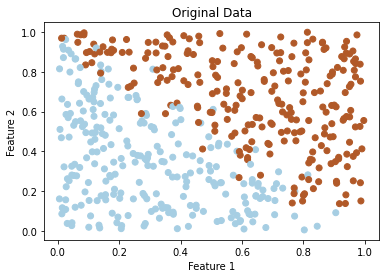

Logistic Regression Accuracy: 0.86
Decision Tree Accuracy: 0.9


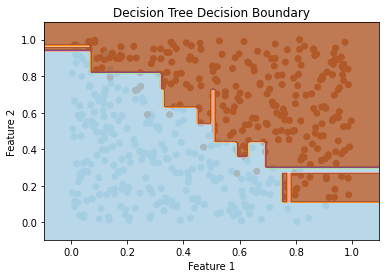

In [30]:
# Линейно-неразделимые данные
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

np.random.seed(42)

X = np.random.rand(500, 2)
y = (X[:, 0] + X[:, 1] + np.random.normal(scale=0.1, size=500)) > 1.0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.title("Original Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

lr_predictions = lr_model.predict(X_test)
dt_predictions = dt_model.predict(X_test)

lr_accuracy = accuracy_score(y_test, lr_predictions)
dt_accuracy = accuracy_score(y_test, dt_predictions)

print("Logistic Regression Accuracy:", lr_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.title("Decision Tree Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

h = 0.01
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = dt_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.show()

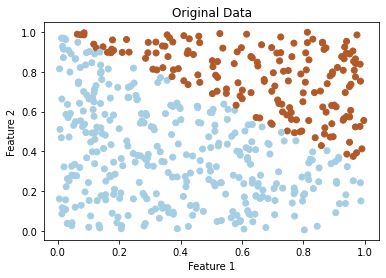

Logistic Regression Accuracy: 0.96
Decision Tree Accuracy: 0.96


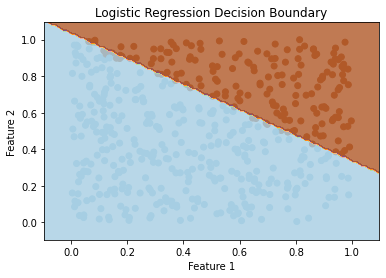

In [31]:
# Линейно разделимые данные
np.random.seed(42)

X = np.random.rand(500, 2)
y = (2 * X[:, 0] + 3 * X[:, 1] > 3).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.title("Original Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

lr_predictions = lr_model.predict(X_test)
dt_predictions = dt_model.predict(X_test)

lr_accuracy = accuracy_score(y_test, lr_predictions)
dt_accuracy = accuracy_score(y_test, dt_predictions)

print("Logistic Regression Accuracy:", lr_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.title("Logistic Regression Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

h = 0.01
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = lr_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.show()


In [127]:
# данные с категориальными признаками
data = pd.DataFrame({
    'Category1': np.random.choice(['A', 'B', 'C'], size=500),
    'Category2': np.random.choice(['X', 'Y', 'Z'], size=500),
    'Numeric1': np.random.randn(500),
    'Numeric2': np.random.randn(500),
    'Target': np.random.choice([0, 1], size=500)
})

data = pd.get_dummies(data, columns=['Category1', 'Category2'])

X = data.drop('Target', axis=1)
y = data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

lr_predictions = lr_model.predict(X_test)
dt_predictions = dt_model.predict(X_test)

lr_accuracy = accuracy_score(y_test, lr_predictions)
dt_accuracy = accuracy_score(y_test, dt_predictions)

print("Logistic Regression Accuracy:", lr_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)

Logistic Regression Accuracy: 0.55
Decision Tree Accuracy: 0.61


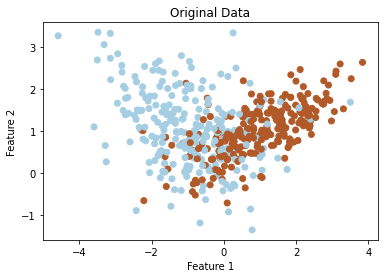

Logistic Regression Accuracy: 0.8
Decision Tree Accuracy: 0.68


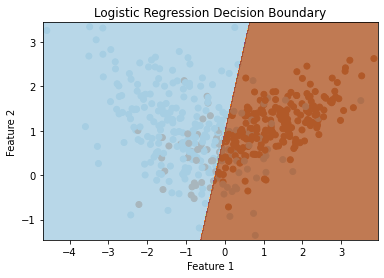

In [41]:
# данные с числовыми признаками
X, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, flip_y=0.1, class_sep=1.0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.title("Original Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

lr_predictions = lr_model.predict(X_test)
dt_predictions = dt_model.predict(X_test)

lr_accuracy = accuracy_score(y_test, lr_predictions)
dt_accuracy = accuracy_score(y_test, dt_predictions)

print("Logistic Regression Accuracy:", lr_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.title("Logistic Regression Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

h = 0.01
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = lr_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.show()

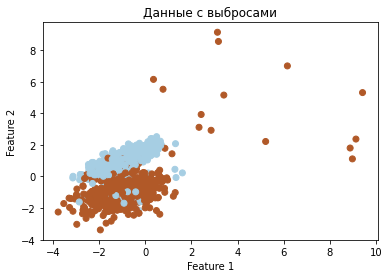

Logistic Regression Accuracy: 0.8916256157635468
Decision Tree Accuracy: 0.896551724137931


In [135]:
# данные с выбросами
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, flip_y=0.1, class_sep=1.0)

X_outliers = np.random.rand(15, 2) * 10
y_outliers = np.ones(15, dtype=bool)  

X = np.vstack([X, X_outliers])
y = np.concatenate([y, y_outliers])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.title("Данные с выбросами")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

lr_predictions = lr_model.predict(X_test)
dt_predictions = dt_model.predict(X_test)

lr_accuracy = accuracy_score(y_test, lr_predictions)
dt_accuracy = accuracy_score(y_test, dt_predictions)

print("Logistic Regression Accuracy:", lr_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)

In [124]:
# данные с большим количеством признаков
X, y = make_classification(n_samples=1000, n_features=100, n_informative=100,
                           n_redundant=0, n_clusters_per_class=1, flip_y=0.1, class_sep=1.0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

lr_predictions = lr_model.predict(X_test)
dt_predictions = dt_model.predict(X_test)

lr_accuracy = accuracy_score(y_test, lr_predictions)
dt_accuracy = accuracy_score(y_test, dt_predictions)

print("Logistic Regression Accuracy:", lr_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)

Logistic Regression Accuracy: 0.83
Decision Tree Accuracy: 0.615


In [125]:
# малое количество признаков
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

lr_accuracy = accuracy_score(y_test, lr_predictions)
dt_accuracy = accuracy_score(y_test, dt_predictions)

print("Logistic Regression Accuracy:", lr_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)

Logistic Regression Accuracy: 0.88
Decision Tree Accuracy: 0.925


Проверить, чтобы при кросс-валидации в каждом разбиении были разные метки

In [96]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

X = np.random.rand(100, 2)
y = np.concatenate([np.zeros(50), np.ones(50)])

X, y = make_classification(n_samples=1000, n_features=20, n_informative=10)
model = LogisticRegression()

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in stratified_kfold.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    unique_classes_train = np.unique(y_train)
    unique_classes_test = np.unique(y_test)

    print(f"Классы в разбиении: {unique_classes_train}")
    print(f"Классы в разбиении: {unique_classes_test}\n")

scores = cross_val_score(model, X, y, cv=stratified_kfold)
print("Точность:", scores)

Классы в разбиении: [0 1]
Классы в разбиении: [0 1]

Классы в разбиении: [0 1]
Классы в разбиении: [0 1]

Классы в разбиении: [0 1]
Классы в разбиении: [0 1]

Классы в разбиении: [0 1]
Классы в разбиении: [0 1]

Классы в разбиении: [0 1]
Классы в разбиении: [0 1]

Точность: [0.78  0.825 0.825 0.83  0.8  ]
